In [51]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [52]:
df = pd.read_csv("vaccination-data.csv")
# To display the top 5 rows
df.head(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2022-01-31,5125146,4554648.0,13.166,11.700,3892831.0,10.000,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,REPORTING,2022-01-23,2571760,1251217.0,89.400,43.965,1127431.0,39.615,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,DZA,AFRO,REPORTING,2022-01-09,12974545,7247787.0,29.588,16.528,5796432.0,13.218,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,ASM,WPRO,REPORTING,2022-01-13,80845,41308.0,146.466,74.837,35887.0,65.016,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,AND,EURO,REPORTING,2022-01-16,135421,57643.0,175.300,75.670,53046.0,69.635,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0


In [53]:
# To display the bottom 5 rows
df.tail(5) 

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
223,Viet Nam,VNM,WPRO,REPORTING,2022-01-20,173708365,78752251.0,178.458,80.905,73571085.0,75.583,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0
224,Wallis and Futuna,WLF,WPRO,REPORTING,2022-01-11,12287,6151.0,109.257,54.695,6136.0,54.562,Moderna - Spikevax,2021-03-19,1.0
225,Yemen,YEM,EMRO,REPORTING,2022-01-31,744060,588626.0,2.495,1.974,344582.0,1.155,"Janssen - Ad26.COV 2-S,SII - Covishield,Sinova...",2021-04-20,3.0
226,Zambia,ZMB,AFRO,REPORTING,2021-11-18,1041441,832532.0,5.665,4.529,651965.0,3.546,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-04-14,3.0
227,Zimbabwe,ZWE,AFRO,REPORTING,2022-01-29,7608063,4263080.0,51.188,28.683,3291261.0,22.144,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",2021-02-18,4.0


In [54]:
# Checking the data type
df.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                        int64
PERSONS_VACCINATED_1PLUS_DOSE           float64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                float64
PERSONS_FULLY_VACCINATED_PER100         float64
VACCINES_USED                            object
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
dtype: object

In [55]:
# Dropping irrelevant columns
df = df.drop(['ISO3', 'DATA_SOURCE'], axis=1)
df.head(5)

,COUNTRY,WHO_REGION,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,EMRO,2022-01-31,5125146,4554648.0,13.166,11.700,3892831.0,10.000,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,EURO,2022-01-23,2571760,1251217.0,89.400,43.965,1127431.0,39.615,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,AFRO,2022-01-09,12974545,7247787.0,29.588,16.528,5796432.0,13.218,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,WPRO,2022-01-13,80845,41308.0,146.466,74.837,35887.0,65.016,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,EURO,2022-01-16,135421,57643.0,175.300,75.670,53046.0,69.635,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0


In [56]:
# Renaming the column names
df = df.rename(columns={"PERSONS_VACCINATED_1PLUS_DOSE": "VACC_1_DOSE", "PERSONS_VACCINATED_1PLUS_DOSE_PER100": "VACC_1_DOSE_PERC" })
df.head(5)

,COUNTRY,WHO_REGION,DATE_UPDATED,TOTAL_VACCINATIONS,VACC_1_DOSE,TOTAL_VACCINATIONS_PER100,VACC_1_DOSE_PERC,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,EMRO,2022-01-31,5125146,4554648.0,13.166,11.700,3892831.0,10.000,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,EURO,2022-01-23,2571760,1251217.0,89.400,43.965,1127431.0,39.615,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,AFRO,2022-01-09,12974545,7247787.0,29.588,16.528,5796432.0,13.218,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,WPRO,2022-01-13,80845,41308.0,146.466,74.837,35887.0,65.016,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,EURO,2022-01-16,135421,57643.0,175.300,75.670,53046.0,69.635,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0


In [57]:
df.count()

COUNTRY                            228
WHO_REGION                         228
DATE_UPDATED                       228
TOTAL_VACCINATIONS                 228
VACC_1_DOSE                        225
TOTAL_VACCINATIONS_PER100          228
VACC_1_DOSE_PERC                   225
PERSONS_FULLY_VACCINATED           225
PERSONS_FULLY_VACCINATED_PER100    225
VACCINES_USED                      225
FIRST_VACCINE_DATE                 208
NUMBER_VACCINES_TYPES_USED         225
dtype: int64

In [58]:
# Finding the null values.
print(df.isnull().sum())

COUNTRY                             0
WHO_REGION                          0
DATE_UPDATED                        0
TOTAL_VACCINATIONS                  0
VACC_1_DOSE                         3
TOTAL_VACCINATIONS_PER100           0
VACC_1_DOSE_PERC                    3
PERSONS_FULLY_VACCINATED            3
PERSONS_FULLY_VACCINATED_PER100     3
VACCINES_USED                       3
FIRST_VACCINE_DATE                 20
NUMBER_VACCINES_TYPES_USED          3
dtype: int64


In [59]:
# Dropping the missing values.
df = df.dropna() 
df.count()

COUNTRY                            206
WHO_REGION                         206
DATE_UPDATED                       206
TOTAL_VACCINATIONS                 206
VACC_1_DOSE                        206
TOTAL_VACCINATIONS_PER100          206
VACC_1_DOSE_PERC                   206
PERSONS_FULLY_VACCINATED           206
PERSONS_FULLY_VACCINATED_PER100    206
VACCINES_USED                      206
FIRST_VACCINE_DATE                 206
NUMBER_VACCINES_TYPES_USED         206
dtype: int64

In [60]:
df.describe()

,TOTAL_VACCINATIONS,VACC_1_DOSE,TOTAL_VACCINATIONS_PER100,VACC_1_DOSE_PERC,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,2.060000e+02,2.060000e+02,206.000000,206.000000,2.060000e+02,206.000000,206.000000
mean,4.628187e+07,2.242208e+07,108.606544,52.122549,1.922911e+07,46.275563,3.995146
std,2.413361e+08,1.126346e+08,65.680267,26.604187,1.000154e+08,26.046710,1.875380
min,7.400000e+01,3.700000e+01,0.071000,0.054000,3.700000e+01,0.051000,1.000000
25%,4.289728e+05,2.761792e+05,51.630000,31.113750,2.292022e+05,26.388500,3.000000
50%,2.660830e+06,1.695189e+06,111.857000,57.895500,1.200180e+06,49.516000,4.000000
75%,1.556007e+07,7.637071e+06,160.339250,74.375500,6.192508e+06,70.049750,5.000000
max,2.976059e+09,1.275691e+09,243.371000,103.112000,1.225201e+09,92.126000,10.000000


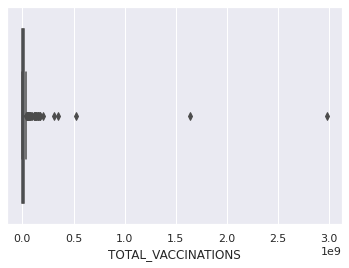

In [61]:
sns.boxplot(x=df['TOTAL_VACCINATIONS'])

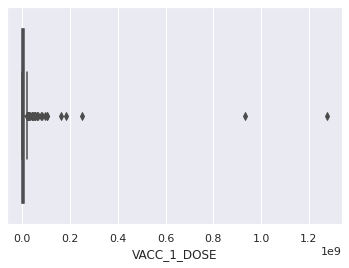

In [62]:
sns.boxplot(x=df['VACC_1_DOSE'])

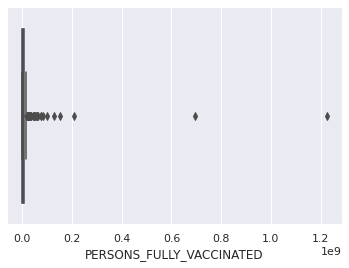

In [63]:
sns.boxplot(x=df['PERSONS_FULLY_VACCINATED'])

,TOTAL_VACCINATIONS,VACC_1_DOSE,TOTAL_VACCINATIONS_PER100,VACC_1_DOSE_PERC,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
TOTAL_VACCINATIONS,1.000000,0.991359,0.151609,0.162254,0.999683,0.146415,0.221054
VACC_1_DOSE,0.991359,1.000000,0.137728,0.155787,0.992806,0.133574,0.227008
TOTAL_VACCINATIONS_PER100,0.151609,0.137728,1.000000,0.969017,0.148278,0.978230,0.135317
VACC_1_DOSE_PERC,0.162254,0.155787,0.969017,1.000000,0.160617,0.981618,0.162302
PERSONS_FULLY_VACCINATED,0.999683,0.992806,0.148278,0.160617,1.000000,0.145073,0.223498
PERSONS_FULLY_VACCINATED_PER100,0.146415,0.133574,0.978230,0.981618,0.145073,1.000000,0.113174
NUMBER_VACCINES_TYPES_USED,0.221054,0.227008,0.135317,0.162302,0.223498,0.113174,1.000000


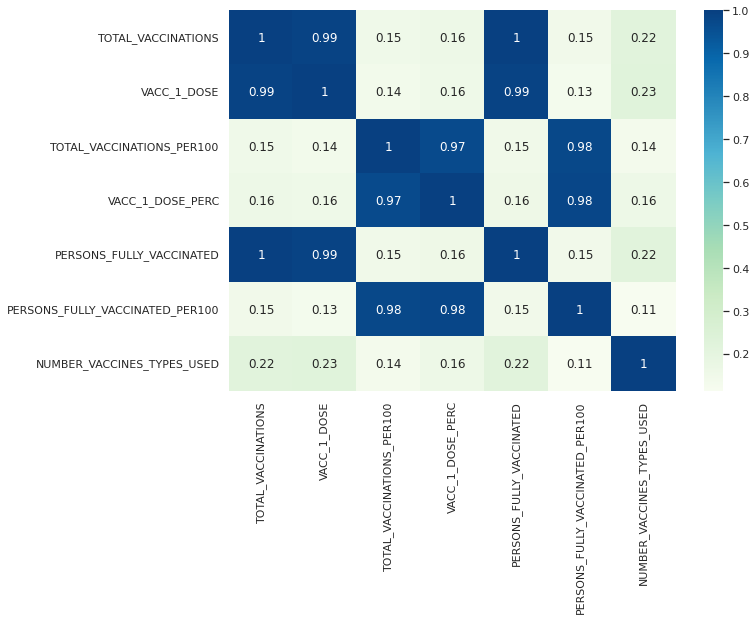

In [64]:
# Finding the relations between the variables.
plt.figure(figsize=(10,7))
corr= df.corr()
sns.heatmap(corr,cmap="GnBu",annot=True)
corr

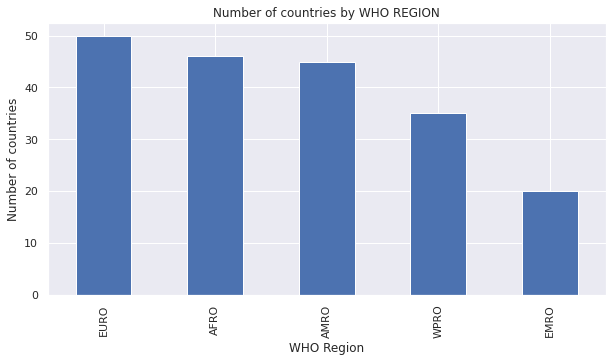

In [65]:
# Plotting a Histogram
df.WHO_REGION.value_counts().nlargest().plot(kind='bar', figsize=(10,5))
plt.title("Number of countries by WHO REGION")
plt.ylabel('Number of countries')
plt.xlabel('WHO Region');

In [66]:
#sum groupby WHO_REGION
df_vaccinations_by_WHO_region = df[['WHO_REGION','TOTAL_VACCINATIONS','VACC_1_DOSE','PERSONS_FULLY_VACCINATED']].groupby('WHO_REGION').sum()

df_vaccinations_by_WHO_region.reset_index(inplace = True)
#order descending
df_vaccinations_by_WHO_region.sort_values(by = ['TOTAL_VACCINATIONS'], ascending = False, inplace = True)
df_vaccinations_by_WHO_region

,WHO_REGION,TOTAL_VACCINATIONS,VACC_1_DOSE,PERSONS_FULLY_VACCINATED
5,WPRO,3767948369,1.645508e+09,1.575236e+09
4,SEARO,2321002178,1.318323e+09,9.728556e+08
1,AMRO,1535536081,7.401860e+08,6.383854e+08
3,EURO,1133124159,4.734460e+08,4.372614e+08
2,EMRO,563455203,3.023100e+08,2.467071e+08
0,AFRO,212998545,1.391754e+08,9.075081e+07


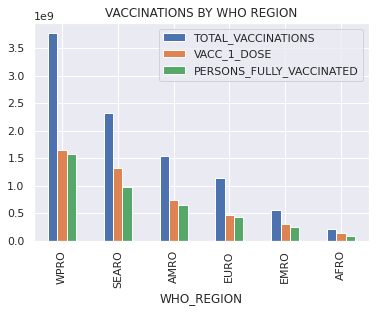

In [67]:
df_vaccinations_by_WHO_region.plot.bar(x = 'WHO_REGION', y = ['TOTAL_VACCINATIONS','VACC_1_DOSE','PERSONS_FULLY_VACCINATED'], 
                                 title = 'VACCINATIONS BY WHO REGION')

In [68]:
df.head(5)

,COUNTRY,WHO_REGION,DATE_UPDATED,TOTAL_VACCINATIONS,VACC_1_DOSE,TOTAL_VACCINATIONS_PER100,VACC_1_DOSE_PERC,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,EMRO,2022-01-31,5125146,4554648.0,13.166,11.700,3892831.0,10.000,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,EURO,2022-01-23,2571760,1251217.0,89.400,43.965,1127431.0,39.615,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,AFRO,2022-01-09,12974545,7247787.0,29.588,16.528,5796432.0,13.218,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,WPRO,2022-01-13,80845,41308.0,146.466,74.837,35887.0,65.016,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,EURO,2022-01-16,135421,57643.0,175.300,75.670,53046.0,69.635,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0


In [71]:
df['FIRST_VACCINE_MONTH_YEAR'] = df['FIRST_VACCINE_DATE'].str[:7]
df['FIRST_VACCINE_MONTH_YEAR']

0      2021-02
1      2021-01
2      2021-01
3      2020-12
4      2021-01
        ...   
223    2021-03
224    2021-03
225    2021-04
226    2021-04
227    2021-02
Name: FIRST_VACCINE_MONTH_YEAR, Length: 206, dtype: object

In [72]:
#sum groupby WHO_REGION
df_number_of_countries_by_vaccination_month_year = df[['COUNTRY','FIRST_VACCINE_MONTH_YEAR']].groupby('FIRST_VACCINE_MONTH_YEAR').count()

df_number_of_countries_by_vaccination_month_year.reset_index(inplace = True)
df_number_of_countries_by_vaccination_month_year

,FIRST_VACCINE_MONTH_YEAR,COUNTRY
0,2020-07,1
1,2020-11,2
2,2020-12,42
3,2021-01,33
4,2021-02,50
5,2021-03,47
6,2021-04,18
7,2021-05,4
8,2021-06,6
9,2021-07,2


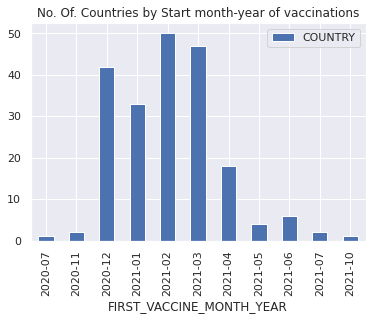

In [76]:
df_number_of_countries_by_vaccination_month_year.plot.bar(x = 'FIRST_VACCINE_MONTH_YEAR', y = 'COUNTRY',
                                 title = 'No. Of. Countries by Start month-year of vaccinations')